# Advanced fMRI data analysis 
## Functional connectivity


In this assignment, your task is to run simple seed-to-voxel functional connectivity analysis of fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 19-06-2020

-------------------

## Task 1



Repeat seed-to-voxel analysis from our last excercise with your favourite brain region as a *seed*!

### Fill some details about the selected seed region:

Name of the selected brain area: Left amygdala

MNI coordinates of selected brain area: (-9,-17,6)

Source (website, journal article, etc.): Haxby, J., Gobbini, M., Furey, M., Ishai, A., Schouten, J., and Pietrini, P. (2001). Distributed and overlapping representations of faces and objects in ventral temporal cortex. Science 293, 2425-2430.

In [71]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting


dataset3 = datasets.fetch_haxby(subjects=1)
func_filename = dataset3.func[0]


pcc_coords = [(-9, -17, 6)]
seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True)

seed_timeseries = seed_masker.fit_transform(func_filename)
seed_timeseries = np.squeeze(seed_timeseries)


brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True, memory='nilearn_cache', memory_level=1, verbose=0)

brain_timeseries = brain_masker.fit_transform(func_filename)


print(seed_timeseries.shape)
print(brain_timeseries.shape)

(1452,)
(1452, 163839)


In [72]:
from scipy import stats

corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

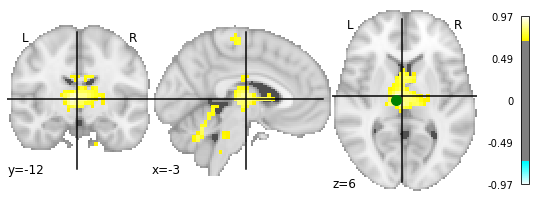

In [78]:
seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)

display = plotting.plot_stat_map(seed_to_voxel_correlations_img, threshold=0.7)
display.add_markers(pcc_coords, marker_color='g', marker_size=100)


What brain areas are functionally connected with your seed region?

**Answer**: 

In [80]:
#Right amigdala, closely surrounding subcortical regions, brainstem, cerebellum, medial somatosensory cortex